In [17]:
import numpy as np
import pandas as pd
from ziff.stats import BinnedStatistic

filename = '~/temp/shapes_2019_09_17_fid1.hdf'

# Get histogram
shapes = pd.read_hdf(filename)
bs = BinnedStatistic(shapes,groupby=['ccd'])
bins_u, bins_v, hist = bs.get_spatial_bs('T_data', norm_key = 'T_data', statistic = 'median',nbins=100) # Histogram on the size
# care of Nans if there are some
hist[np.isnan((hist))] = 1

# Do the interpolation
from scipy.interpolate import RegularGridInterpolator
interp = RegularGridInterpolator((bins_u[0:-1],bins_v[0:-1]), hist, bounds_error=False, fill_value=1)

# Saving
import pickle
with open('/Users/graziani/temp/interpolator.pkl', 'wb') as f:
    pickle.dump(interp, f)


<IPython.core.display.Javascript object>


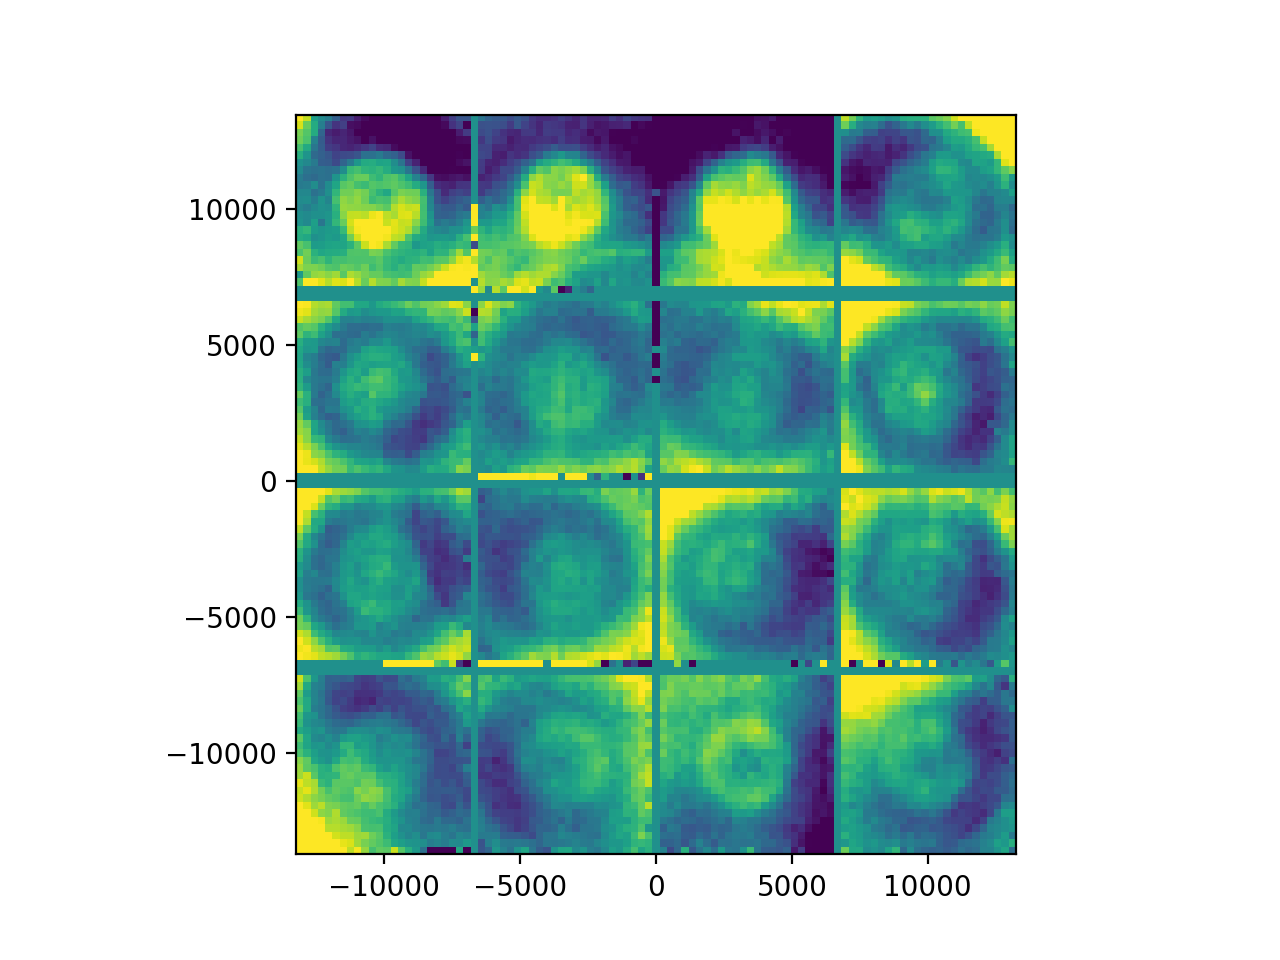

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(hist.T, origin = 'lower', extent = (bins_u[0], bins_u[-1], bins_v[0], bins_v[-1]),vmin=0.98, vmax = 1.02)

# WITH MAP

In [3]:
from ztfquery.query import ZTFQuery
zquery = ZTFQuery()
zquery.load_metadata(sql_query = "ccdid=7 and qid=1 and fid=1 and obsjd BETWEEN 2458543.9 AND 2458544")


In [7]:
import ziff.ziff 
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

z = ziff.ziff.ZiffCollection.from_zquery(zquery, groupby=('filefracday'),build_default_cat = False, load_default_cat = False)


01:34:52 INFO:test


In [ ]:
z.eval_func('load_default_catalog')
z.eval_func('set_config_value',key_path = 'psf,interp,order',value=3)
z.eval_func('set_config_value',key_path = 'psf,outliers,max_remove',value=20)
z.eval_func('set_config_value',key_path='psf,interp,type',value='BasisPolynomialPlusMap')
z.eval_func('set_config_value',key_path = 'psf,interp,interpolation_map_file',value='/Users/graziani/temp/interpolator.pkl')
z.eval_func('run_piff', catalog = 'gaia_calibration', overwrite_cat=True)

Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs


/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
02:56:49 INFO:Reading in 1 images
02:56:50 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_sciimg.fits
02:56:50 INFO:Setting pointing from keywords TELRA, TELDEC
02:56:50 INFO:Setting pointing to: 13.995 h, -9.850 d
02:56:50 INFO:Reading in 1 images
02:56:50 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_z

02:58:45 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482963/ztf_20190301482963_000476_zg_c07_o_q1_sciimg.fits
02:58:45 INFO:Setting pointing from keywords TELRA, TELDEC
02:58:45 INFO:Setting pointing to: 13.729 h, 4.550 d
02:58:45 INFO:Reading in 1 images
02:58:45 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482963/ztf_20190301482963_000476_zg_c07_o_q1_sciimg.fits
02:58:45 INFO:Setting pointing from keywords TELRA, TELDEC
02:58:45 INFO:Setting pointing to: 13.729 h, 4.550 d
02:58:45 WARNING:Iteration 1: Fitting 195 stars
02:58:53 INFO:Beginning solution of matrix size (3150, 3150)
02:58:54 INFO:Ill-conditioned matrix (rcond=1.69749e-34): result may not be accurate.
02:58:54 WARNING:             Total chisq = 19385.14 / 43797 dof
02:58:54 WARNING:Iteration 2: Fitting 195 stars


In [32]:
for zi in z.ziffs:
    zi.set_config_value('psf,interp,order',3)
    zi.set_config_value('psf,outliers,max_remove',20)
    zi.set_config_value('psf,interp,interpolation_map_file','/Users/graziani/temp/interpolator.pkl')
    zi.set_config_value('psf,interp,type','BasisPolynomialPlusMap')
    zi.run_piff('gaia_calibration',overwrite_cat=True)


01:25:27 INFO:test
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
01:25:27 INFO:Reading in 1 images
01:25:27 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:25:27 INFO:Setting pointing from keywords TELRA, TELDEC
01:25:27 INFO:Setting pointing to: 13.931 h, 18.950 d


Loading default catalogs


01:25:28 INFO:Reading in 1 images
01:25:28 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:25:28 INFO:Setting pointing from keywords TELRA, TELDEC
01:25:28 INFO:Setting pointing to: 13.931 h, 18.950 d
01:25:28 WARNING:Iteration 1: Fitting 148 stars


KeyboardInterrupt: 

01:24:49 WARNING:Using already saved catalogs
01:24:49 INFO:Reading in 1 images
01:24:49 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:24:49 INFO:Setting pointing from keywords TELRA, TELDEC
01:24:49 INFO:Setting pointing to: 13.931 h, 18.950 d
01:24:49 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:24:49 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_full.fits.
01:24:49 INFO:Processing catalog 0 with 459 stars
01:24:50 WARNING:Read a total of 459 stars from 1 image
01:24:51 INFO:Reading in 1 images
01:24:51 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
01:24:51 INFO:Setting pointing from keywords TELRA, TELDEC
01:24:51 INFO:Setting pointing to: 13.931 h, 18.950 d


Processing 1/459 Processing 2/459 Processing 3/459 Processing 4/459 Processing 5/459 Processing 6/459 Processing 7/459 Processing 8/459 Processing 9/459 Processing 10/459 Processing 11/459 Processing 12/459 Processing 13/459 Processing 14/459 Processing 15/459 Processing 16/459 Processing 17/459 Processing 18/459 Processing 19/459 Processing 20/459 Processing 21/459 Processing 22/459 Processing 23/459 Processing 24/459 Processing 25/459 Processing 26/459 Processing 27/459 Processing 28/459 Processing 29/459 Processing 30/459 Processing 31/459 Processing 32/459 Processing 33/459 Processing 34/459 Processing 35/459 Processing 36/459 Processing 37/459 Processing 38/459 Processing 39/459 Processing 40/459 Processing 41/459 Processing 42/459 Processing 43/459 Processing 44/459 Processing 45/459 Processing 46/459 Processing 47/459 Processing 48/459 Processing 49/459 Processing 50/459 Processing 51/459 Processing 52/459 Processing 53/459 Processing 54/459 Processing 55/459 Processing 56/459 P

Processing 452/459 Processing 453/459 Processing 454/459 Processing 455/459 Processing 456/459 Processing 457/459 Processing 458/459 Processing 459/459 

<IPython.core.display.Javascript object>


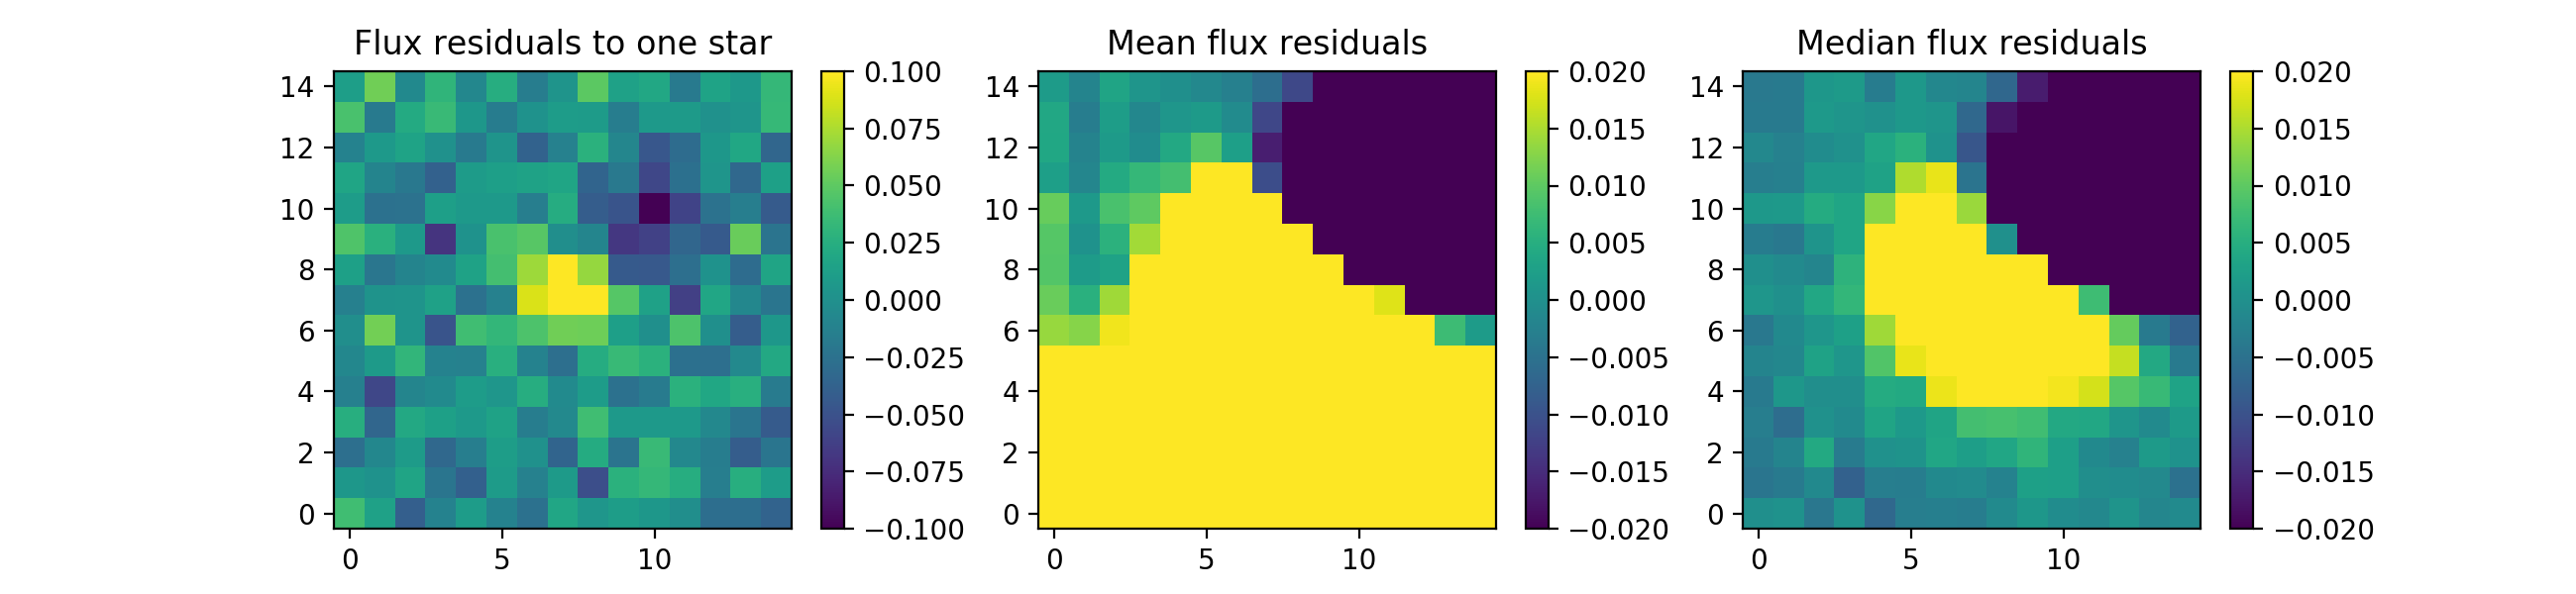

In [31]:
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=False,append_df_keys = ['RPmag','BPmag','Gmag','colormag','sky','xpos','ypos'])
new_stars = z.reflux_stars(stars,fit_center=False, which='piff')
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)
import numpy as np
import matplotlib.pyplot as P
fig, axes = P.subplots(1,3,figsize=(13,3))
im_kwargs  = {'origin':'lower', 'vmin' : -0.1, 'vmax': 0.1}
i = axes[0].imshow(res[0].T, **im_kwargs)
fig.colorbar(i,ax=axes[0])
axes[0].set_title('Flux residuals to one star')
im_kwargs  = {'origin':'lower', 'vmin' : -0.02, 'vmax': 0.02}
axes[1].set_title('Mean flux residuals')
i = axes[1].imshow(np.mean(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[1])

axes[2].set_title('Median flux residuals')
i = axes[2].imshow(np.median(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[2])



<IPython.core.display.Javascript object>


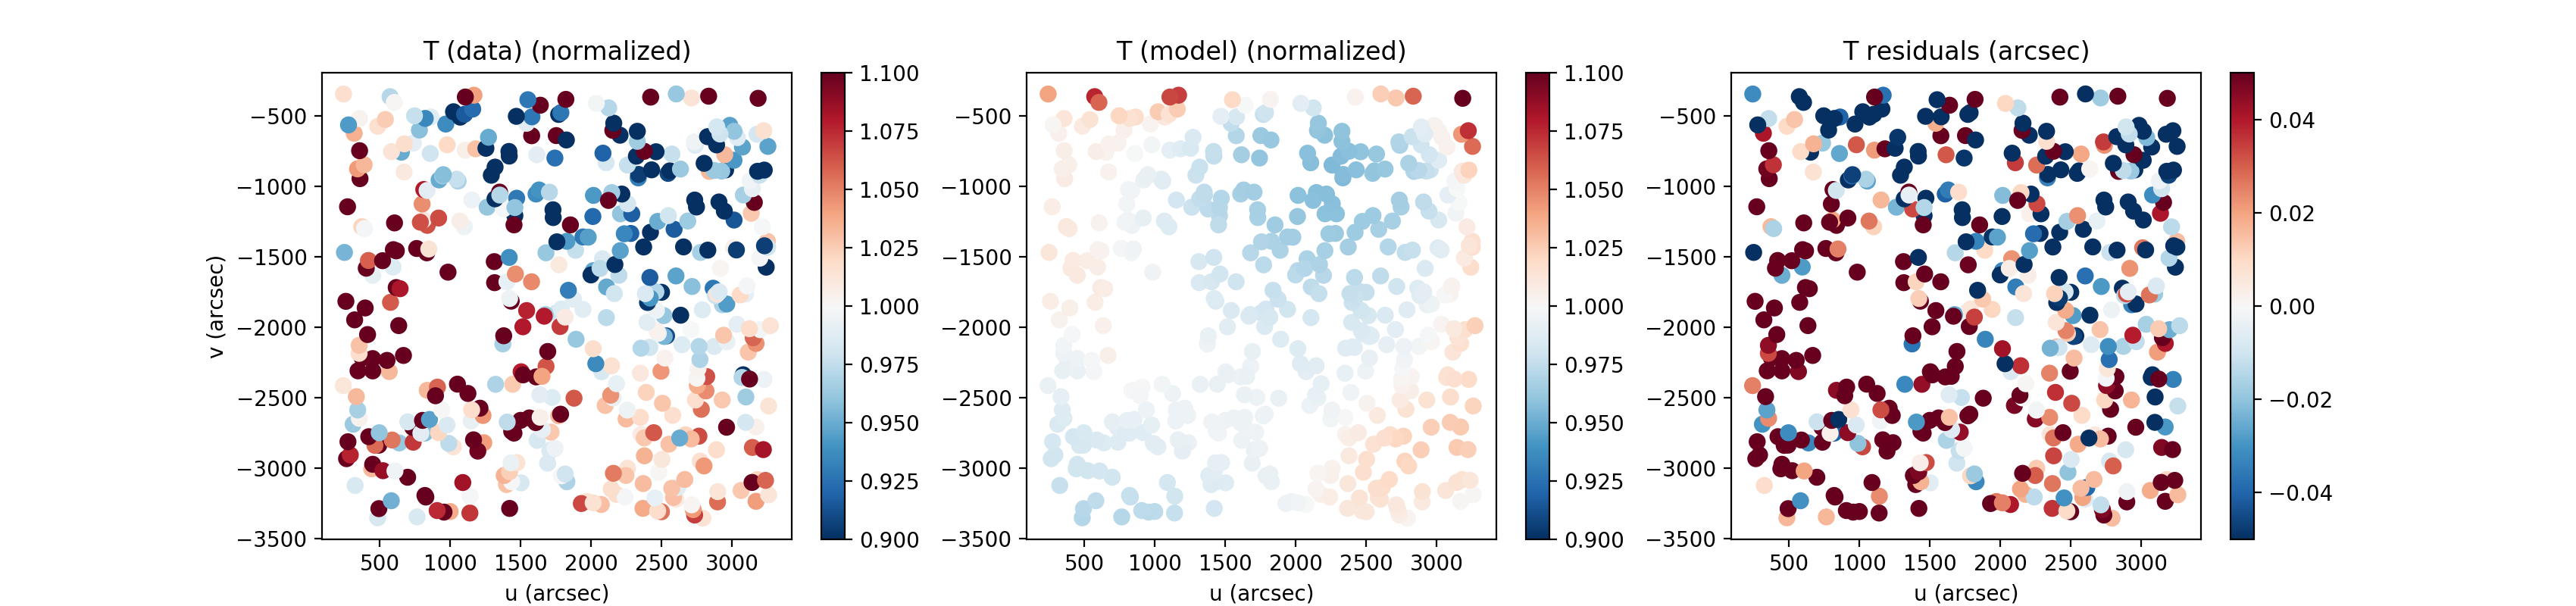

In [28]:
fig, axes = P.subplots(1,3,figsize=(17,4))
scat_kwargs = {'cmap':'RdBu_r', 's':50}

s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[0].set_title('T (data) (normalized)')
axes[0].set_xlabel('u (arcsec)')
axes[0].set_ylabel('v (arcsec)')

fig.colorbar(s,ax=axes[0])

s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[1].set_xlabel('u (arcsec)')
axes[1].set_title('T (model) (normalized)')
fig.colorbar(s,ax=axes[1])


s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),vmin=-0.05,vmax=0.05,**scat_kwargs)
axes[2].set_xlabel('u (arcsec)')
axes[2].set_title('T residuals (arcsec)')
fig.colorbar(s,ax=axes[2])

# WITHOUT MAP

11:47:07 INFO:test
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
11:47:07 INFO:Reading in 1 images
11:47:07 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:47:07 INFO:Setting pointing from keywords TELRA, TELDEC
11:47:07 INFO:Setting pointing to: 13.931 h, 18.950 d


Loading default catalogs


11:47:07 INFO:Reading in 1 images
11:47:07 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:47:07 INFO:Setting pointing from keywords TELRA, TELDEC
11:47:07 INFO:Setting pointing to: 13.931 h, 18.950 d
11:47:07 WARNING:Iteration 1: Fitting 148 stars
11:47:10 INFO:Beginning solution of matrix size (2250, 2250)
11:47:10 INFO:Ill-conditioned matrix (rcond=7.39133e-25): result may not be accurate.
11:47:11 WARNING:             Total chisq = 24920.02 / 33210 dof
11:47:11 WARNING:Iteration 2: Fitting 148 stars
11:47:14 INFO:Beginning solution of matrix size (2250, 2250)
11:47:14 INFO:Ill-conditioned matrix (rcond=8.80838e-25): result may not be accurate.
11:47:15 INFO:Found 14 stars with chisq > thresh
11:47:15 INFO:             Removed 14 outliers
11:47:15 WARNING:             Total chisq = 8393.72 / 30070 dof
11:47:15 WARNING:Iteration 3: Fitting 134 stars
11:47:17 INFO:Beginning solution of matrix size (

Processing 1/459 Processing 2/459 Processing 3/459 Processing 4/459 Processing 5/459 Processing 6/459 Processing 7/459 Processing 8/459 Processing 9/459 Processing 10/459 Processing 11/459 Processing 12/459 Processing 13/459 Processing 14/459 Processing 15/459 Processing 16/459 Processing 17/459 Processing 18/459 Processing 19/459 Processing 20/459 Processing 21/459 Processing 22/459 Processing 23/459 Processing 24/459 Processing 25/459 Processing 26/459 Processing 27/459 Processing 28/459 Processing 29/459 Processing 30/459 Processing 31/459 Processing 32/459 Processing 33/459 Processing 34/459 Processing 35/459 Processing 36/459 Processing 37/459 Processing 38/459 Processing 39/459 Processing 40/459 Processing 41/459 Processing 42/459 Processing 43/459 Processing 44/459 Processing 45/459 Processing 46/459 Processing 47/459 Processing 48/459 Processing 49/459 Processing 50/459 Processing 51/459 Processing 52/459 Processing 53/459 Processing 54/459 Processing 55/459 Processing 56/459 P

Processing 438/459 Processing 439/459 Processing 440/459 Processing 441/459 Processing 442/459 Processing 443/459 Processing 444/459 Processing 445/459 Processing 446/459 Processing 447/459 Processing 448/459 Processing 449/459 Processing 450/459 Processing 451/459 Processing 452/459 Processing 453/459 Processing 454/459 Processing 455/459 Processing 456/459 Processing 457/459 Processing 458/459 Processing 459/459 

<IPython.core.display.Javascript object>


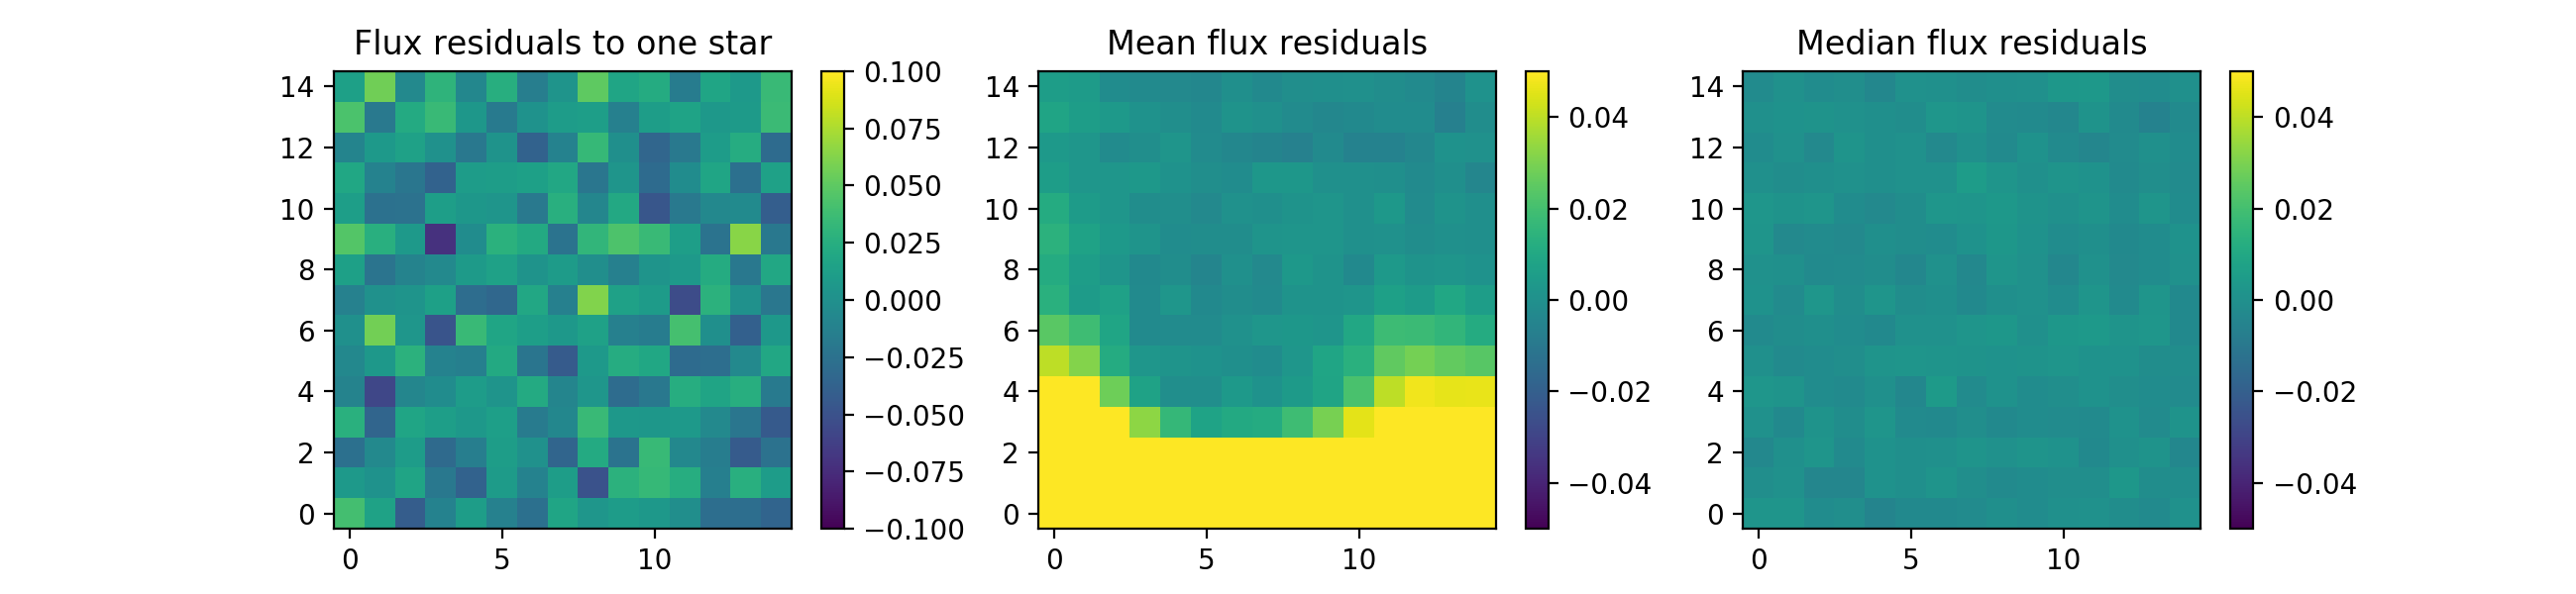

<IPython.core.display.Javascript object>


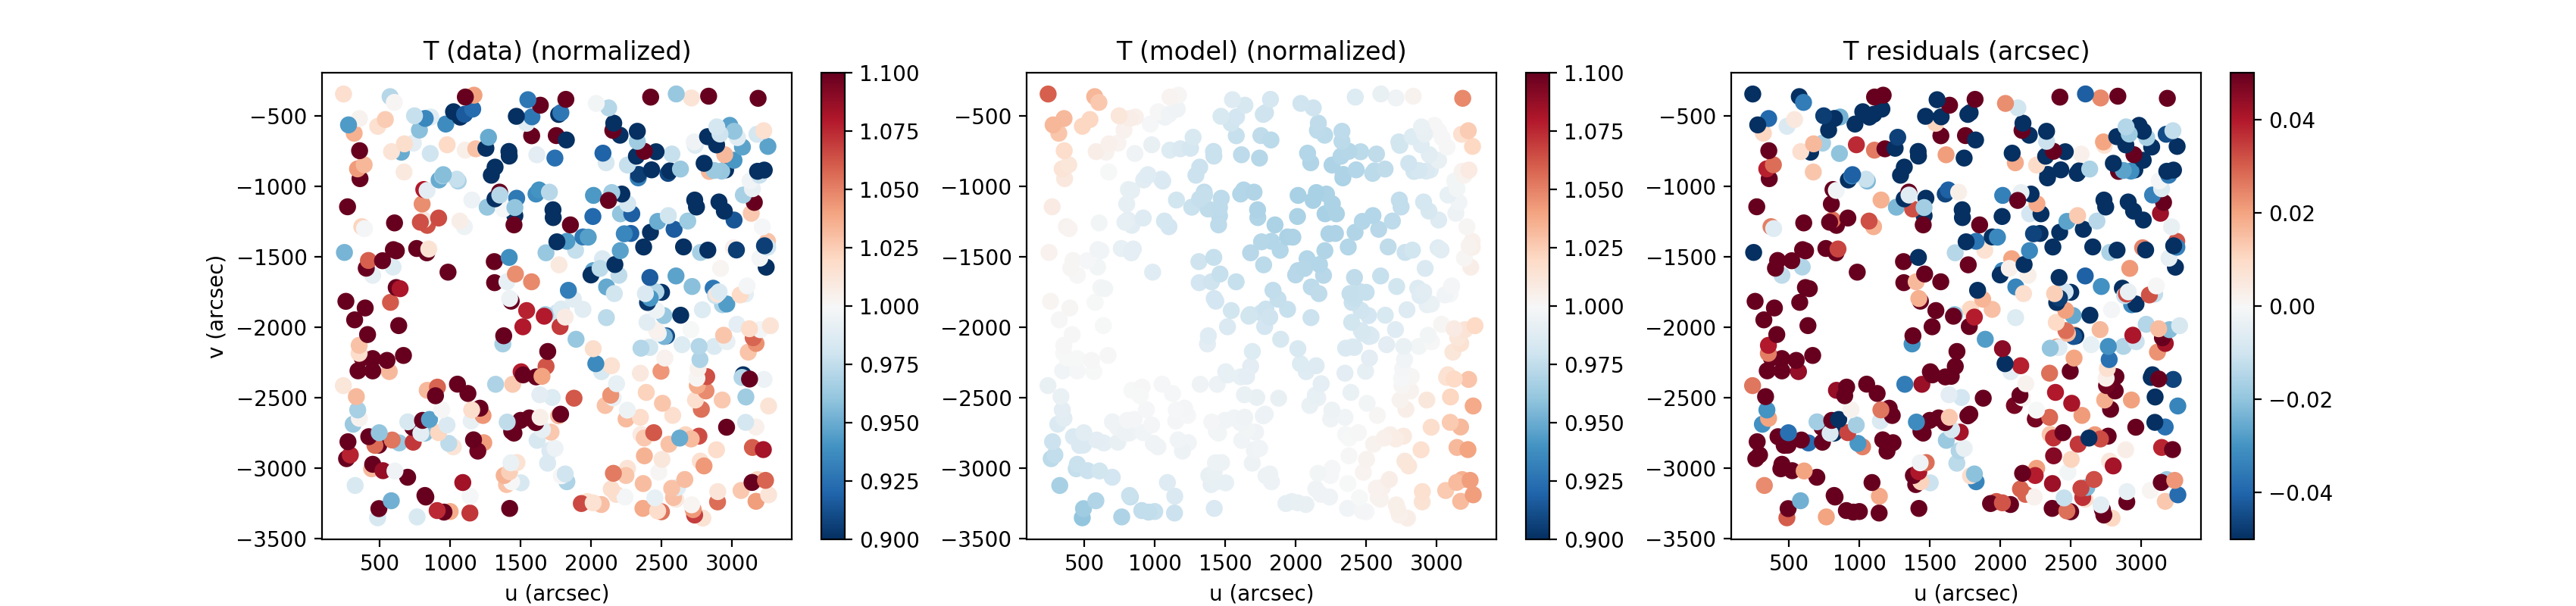

In [29]:
import ziff.ziff 
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")
imgs = ['/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q{}_sciimg.fits'.format(i+1) for i in range(4)]
imgs = imgs[0]
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)
z.set_config_value('psf,interp,order',3)
z.set_config_value('psf,outliers,max_remove',20)
z.run_piff('gaia_calibration',overwrite_cat=True)
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=False,append_df_keys = ['RPmag','BPmag','Gmag','colormag','sky','xpos','ypos'])
new_stars = z.reflux_stars(stars,fit_center=True, which='minuit')
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)
import numpy as np
import matplotlib.pyplot as P
fig, axes = P.subplots(1,3,figsize=(13,3))
im_kwargs  = {'origin':'lower', 'vmin' : -0.1, 'vmax': 0.1}
i = axes[0].imshow(res[0].T, **im_kwargs)
fig.colorbar(i,ax=axes[0])
axes[0].set_title('Flux residuals to one star')
im_kwargs  = {'origin':'lower', 'vmin' : -0.05, 'vmax': 0.05}
axes[1].set_title('Mean flux residuals')
i = axes[1].imshow(np.mean(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[1])

axes[2].set_title('Median flux residuals')
i = axes[2].imshow(np.median(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[2])
fig, axes = P.subplots(1,3,figsize=(17,4))
scat_kwargs = {'cmap':'RdBu_r', 's':50}

s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[0].set_title('T (data) (normalized)')
axes[0].set_xlabel('u (arcsec)')
axes[0].set_ylabel('v (arcsec)')

fig.colorbar(s,ax=axes[0])

s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[1].set_xlabel('u (arcsec)')
axes[1].set_title('T (model) (normalized)')
fig.colorbar(s,ax=axes[1])


s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),vmin=-0.05,vmax=0.05,**scat_kwargs)
axes[2].set_xlabel('u (arcsec)')
axes[2].set_title('T residuals (arcsec)')
fig.colorbar(s,ax=axes[2])



# REAL MAP

<IPython.core.display.Javascript object>


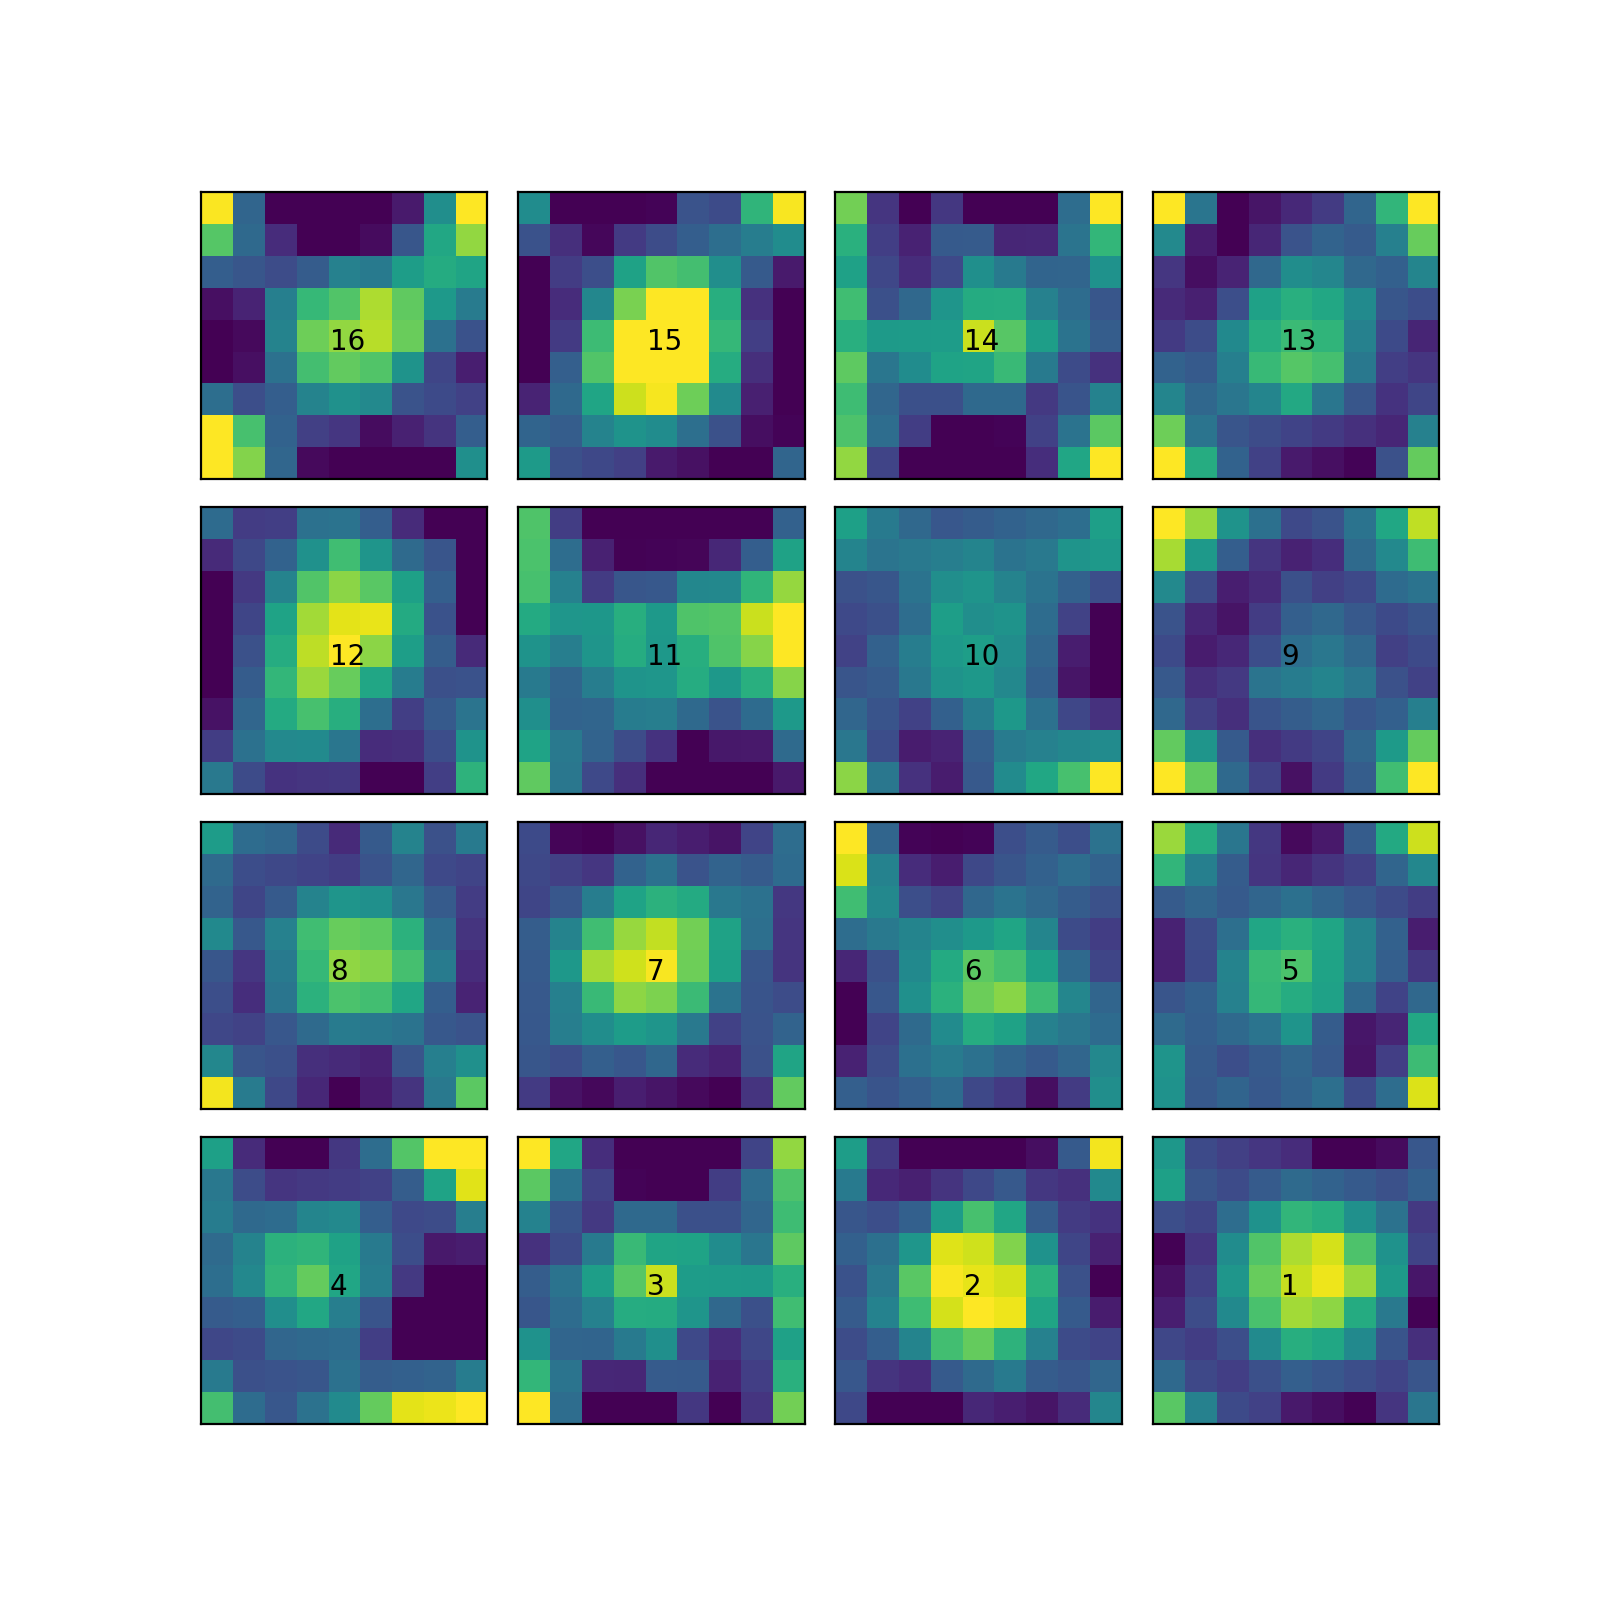

In [24]:
path = '/Users/graziani/libs/Ziff/ziff/data/'
names = {1:'12451-09-01',2:'12451-02-01',3:'10353-17-01',4:'12472-08-01',5:'13422-15-01',6:'13481-02-01',7:'13451-13-01',
         8:'13422-20-01',9:'13451-22-01',10:'13422-19-01',11:'13413-01-01',12:'13481-12-01',13:'12423-04-01',14:'10353-17-01',
         15:'10353-02-01',16:'12461-15-01'}
suffix = '_post-burnin_flatness.xls'
import numpy as np

rotated = [1,2,5,6,9,10,13,14]
def read_file(filename='/Users/graziani/libs/Ziff/ziff/data/10353-02-01_post burnin_flatness.xls'):
    df = pd.read_excel(filename,header=15,usecols='L:N',nrows=81,names='X Y Z'.split())
    df = pd.read_excel(filename,header=15,usecols='T:V',nrows=81,names='X Y Z'.split())
    return df

def read_plane(filename):
    df = pd.read_excel(filename,header=15,usecols='Z:AI',nrows=9,index_col=0)
    return df

def plot_plane(df,ax = None):
    if ax is None:
        fig, ax = P.subplots()
    s = ax.imshow(df.values.T,origin='lower')
    P.colorbar(s)
    return ax
    
def plot_thickness():
    fig, axes = P.subplots(4,4,figsize=(8,8),gridspec_kw={'hspace':0.1,'wspace':0.1})
    for i in range(4):
        for j in range(4):
            ccdindex = i+1+4*j
            y = 3-j
            x = 3-i #3-j
            df = read_plane(path + names[ccdindex] + suffix)
            # In order x,y needs to inverse x,y that's why there is a .T
            values = np.rot90(df.values,2)
            if ccdindex in rotated:
                #If rotated there is a 180deg rotation
                values = np.rot90(values,2)
            # Centering on 0
            #z = df['Z'] - N.median(df['Z'])
            #vmax = N.max(N.abs(z))    
            #vmax = 0.02
            #s = axes[y,x].scatter(df['ra'],df['dec'],c=z,vmin=-vmax,vmax=vmax,marker='s',s=130)
            
            #Now the .T is because usual axis=0 means y in numpy
            s = axes[y,x].imshow(values.T,origin='lower',vmin=-4,vmax=7,extent=(0,100,0,100))
            #fig.colorbar(s,ax=axes[y,x])
            axes[y,x].text(45,45,'{}'.format(ccdindex))
            #axes[y,x].set_title('{}'.format(ccdindex))
            axes[y,x].get_xaxis().set_visible(False)
            axes[y,x].get_yaxis().set_visible(False)

    return fig, axes
%matplotlib notebook
fig, axes = plot_thickness()
fig.savefig('/Users/graziani/temp/ccd_thickness.pdf')


In [6]:
X = -0.402,11.2,22.8,34.4,46,57.6,69.2,80.8,92.401
Y = 0.501,12.401,24.301,36.201,48.101,60.001,71.901,83.801,95.701

Z = [[7,1,-3,-6,-7,-8,-6,-4,-0],
[3,1,-1,-2,-2,-3,-3,-4,-4],
[-1,-0,1,3,3,3,1,-1,-5],
[-1,-1,4,7,8,7,5,0,-4],
[-4,-1,4,7,9,8,7,1,-3],
[-5,-2,2,5,7,9,6,2,-2],
[-5,-4,-1,1,4,4,2,1,-2],
[-4,-3,-2,-3,-2,-1,-0,-1,-1],
[1,-1,-5,-6,-6,-4,-3,-0,2]]

<IPython.core.display.Javascript object>


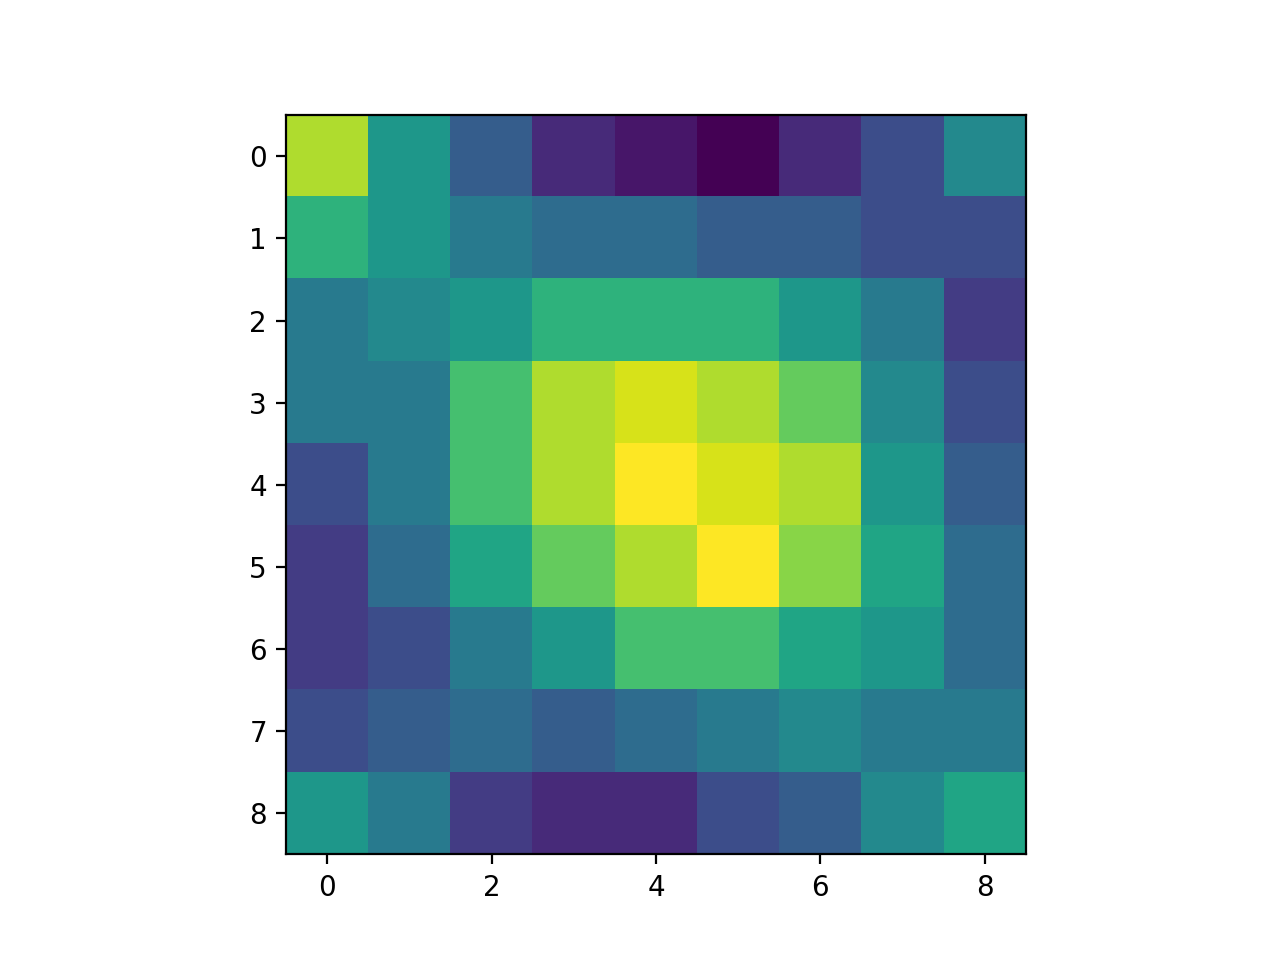

In [7]:
fig, ax = P.subplots()
ax.imshow(Z)

         -0.402     11.200    22.800    34.400    46.000    57.600    69.200  \
0.501   6.900448  1.356395 -3.183945 -5.724058 -7.264397 -7.804963 -6.345303   
12.401  3.206022  0.660112 -0.882085 -2.420341 -1.960907 -2.501246 -3.041586   
24.301 -1.490261 -0.036171  1.423490  2.883377  3.343037  2.802698  1.262131   
36.201 -1.188400 -0.732227  3.727207  7.187094  7.646754  7.106188  4.566075   
48.101 -3.884683 -1.428737  4.030924  7.490811  8.950471  8.408275  6.869566   
60.001 -4.580966 -2.124793  2.334868  4.796385  7.254189  8.711992  6.173283   
71.901 -5.275392 -3.821076 -1.361415  1.098245  3.559763  4.017340  2.475143   
83.801 -3.971675 -2.517585 -2.057925 -2.598038 -2.138377 -0.680800 -0.219283   
95.701  1.332042 -1.215498 -4.754207 -6.294320 -5.834660 -4.377083 -2.915566   

          80.800    92.401  
0.501  -3.885416 -0.427612  
12.401 -3.581925 -4.123895  
24.301 -1.277982 -4.820178  
36.201  0.025509 -3.514604  
48.101  1.331310 -3.212744  
60.001  1.631313 -1.90717

<IPython.core.display.Javascript object>


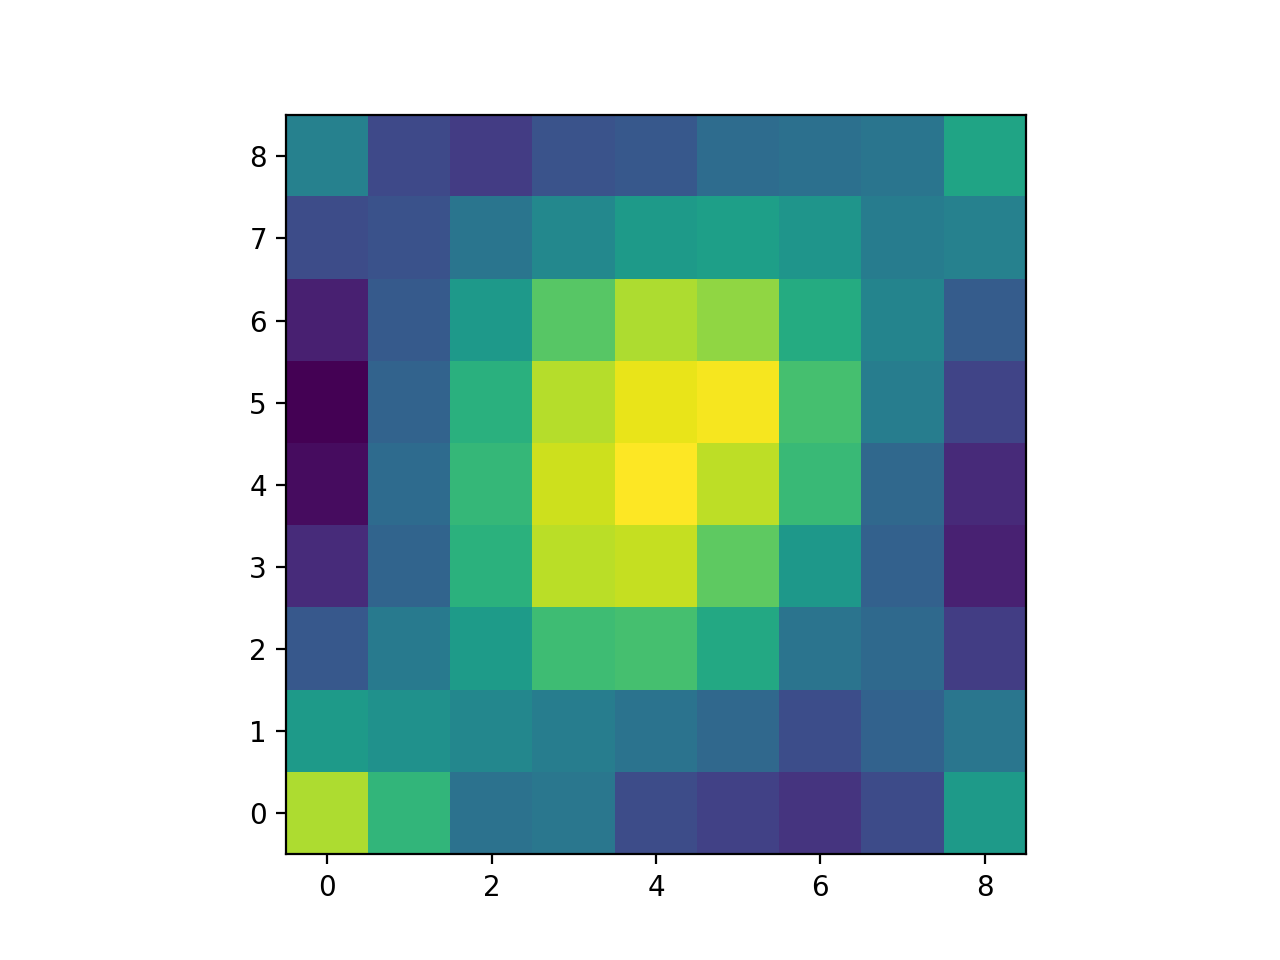

In [15]:
filename='/Users/graziani/libs/Ziff/ziff/data/10353-02-01_post-burnin_flatness.xls'
df = pd.read_excel(filename,header=15,usecols='Z:AI',nrows=9,index_col=0)
print(df)
fig, ax = P.subplots()
ax.imshow(df.values.T,origin='lower')

In [ ]:
a = N.arange()